In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

## Fourier transform and sliding fourier transform of an arbitrary signal


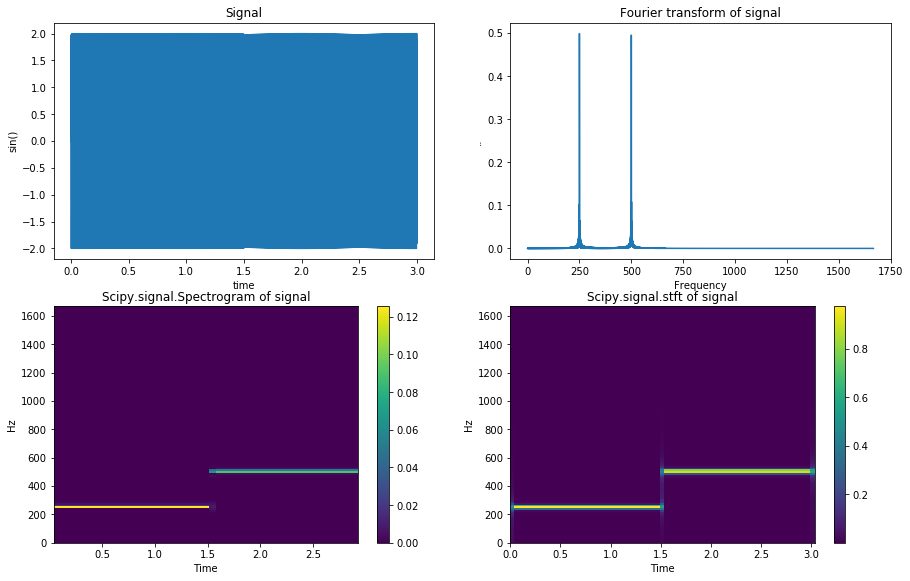

The frequencies should be f1 = 250.0 and f2 = 500


In [143]:
N = 10000 # number of sampled points
sss = 0 # start of interval
se = 3 # end of interval
amp = 2 * 0.5 # 1
fs = N/se # Sampling frequency (sampled points per time unit)
time = np.linspace(0,se,N)  # time points
freq = 500
y= 2*np.sin(np.pi*2*freq*time)*(time>1.5)+2*np.sin(np.pi*freq*time)*(time<1.5)
ftime = np.linspace(0,se*fs/2,N//2)/3 # frequencies
fy = np.fft.fft(y)[:len(y)//2]/len(y) # fourier transform of y
f, t, Z = ss.spectrogram(y, fs) # sliding window of y
ff,tt,ZZ = ss.stft(y,fs)




plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
plt.plot(time,y)
plt.xlabel("time")
plt.ylabel("sin()")
plt.title("Signal")
plt.subplot(4,2,2)
plt.xlabel("Frequency")
plt.ylabel("..")
plt.plot(ftime,np.abs(fy))
plt.title("Fourier transform of signal")

plt.subplot(4,2,3)
plt.pcolormesh(t,f,Z)
plt.colorbar()
plt.ylabel('Hz')
plt.xlabel('Time')
plt.title("Scipy.signal.Spectrogram of signal")
plt.subplot(4,2,4)
plt.pcolormesh(tt,ff,np.abs(ZZ))
plt.colorbar()
plt.ylabel('Hz')
plt.xlabel('Time')
plt.title("Scipy.signal.stft of signal")

plt.show()

print("The frequencies should be f1 = {0} and f2 = {1}".format(0.5*freq,freq))

In the above figure we observe 4 plots; first the signal in the time interval 0 to 3s, that is a sine wave of frequency 250 Hz uptil 1.5s and  then 500 Hz from 1.5s to the end, the second plot shows the fourier transform of the signal and we clearly see the two distinct frequencies situated at 250 Hz and 500 Hz.

In the lower left corner, the scipy.signal.spectrogram is applied on the signal and we now observe that from 0 to 1.5s the signal has a stationnary frequency of 250 Hz, and then from 1.5s it becomes 500 Hz. 

## Application on the Paracou data

In [144]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'


from osgeo import gdal
from scipy import fftpack
import numpy.linalg as npl

gdal.UseExceptions()
ds = gdal.Open(Tifpath)
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())

ds_target1 = np.zeros(len(ds_band1[1000,:]))
ds_target3 = np.zeros(len(ds_band3[1000,:]))

Ny,Nx = np.shape(ds_band3)
x = np.linspace(0,Nx*5,Nx)
y = np.linspace(0,Ny*5,Ny)


### Test on a specific interval

Here we test wether or not the spectrogram function will be able to detect differences between the two images

In [145]:

ls = 712
le = 728
for i in range(ls,le):
    ds_target1 = ds_band1[i,:] + ds_target1
    ds_target3 = ds_band3[i,:] + ds_target3
ds_target1 = ds_target1/(le-ls)
ds_target3 = ds_target3/(le-ls)
N = len(ds_target1)
length = N*5 # 1 pixel correspond to 5 metres (?)
fs = N/length

x = np.linspace(0,length,N)
xf = np.linspace(0,length*fs/2,N//2)/length
fy = fftpack.fft(ds_target1)[:N//2]/N
fy2 = fftpack.fft(ds_target3)[:N//2]/N



<ipython-input-147-67fa570455f6>:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(ds_target1)*10,label="band 1")
<ipython-input-147-67fa570455f6>:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(ds_target3)*10, label = "band 3")


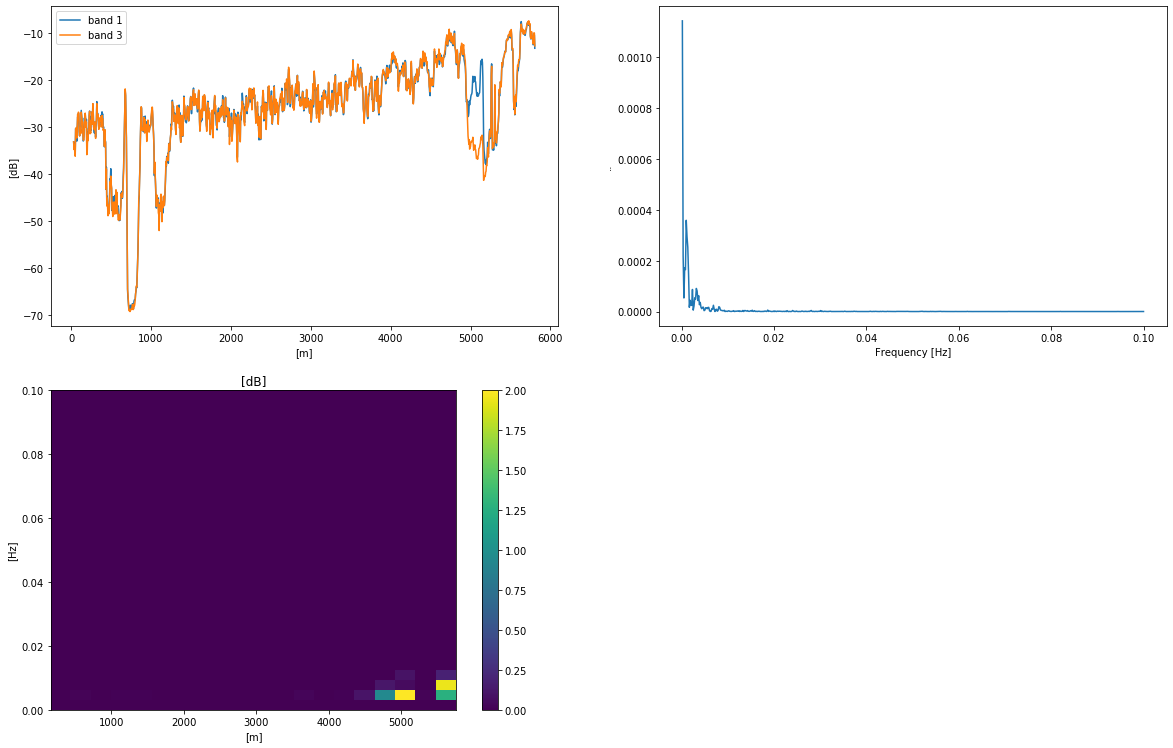

In [147]:
j = ds_target1*ds_target3
nf = 2**6
f, t, Z = ss.spectrogram(ds_target1, fs,nperseg=nf)
f1, t1, Z1 = ss.spectrogram(ds_target3, fs,nperseg=nf)

ff, tt, ZZ = ss.spectrogram(j, fs,nperseg=nf)
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.plot(x,np.log(ds_target1)*10,label="band 1")
plt.plot(x,np.log(ds_target3)*10, label = "band 3")
plt.xlabel("[m]")
plt.ylabel("[dB]")
plt.legend()
plt.subplot(3,2,2)
plt.xlabel("Frequency [Hz]")
plt.ylabel("..")
plt.plot(xf[1:],np.abs(fy[1:])*np.abs(fy2[1:]))
plt.subplot(3,2,3)
plt.pcolormesh(t,f,Z*Z1,vmin=0,vmax=2)
plt.ylabel('[Hz]')
plt.xlabel('[m]')
plt.colorbar()
plt.title("[dB]")


plt.show()



In the upper left plot we see that there is a difference between the two images/signals around 5000m; this is confirmed in the lower left corner, where the product of the fourier transforms is showed, and around 5000m there are frequencies non zeros.

## Application on the whole image

1153 1153


<ipython-input-132-2125c98ab8df>:45: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(mat1)*10)


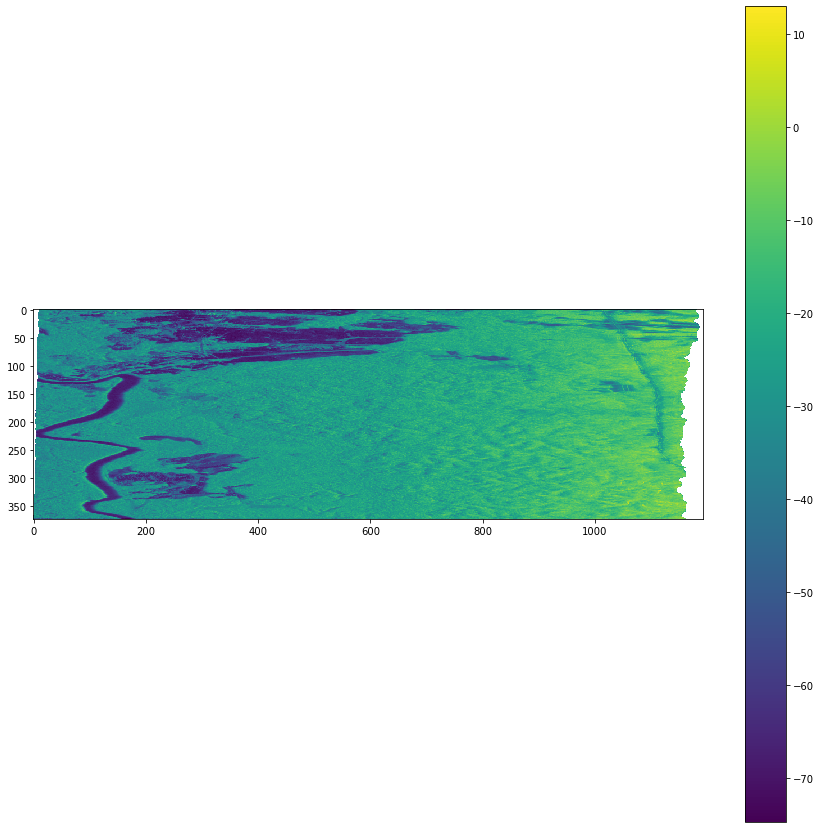

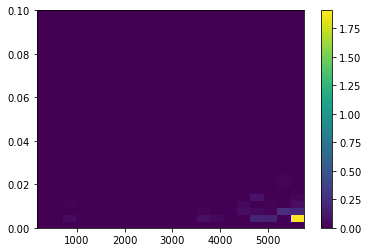

In [132]:
def mean_calc(im1,im2,ls,le):
    mean_im1=np.zeros(np.shape(im1[100,:]))
    mean_im2=np.copy(mean_im1)
    for i in range(ls,le):
        mean_im1 = im1[i,:] + mean_im1
        mean_im2 = im2[i,:] + mean_im2
    mean_im1 = mean_im1/(le-ls)
    mean_im2 = mean_im2/(le-ls)
    return mean_im1,mean_im2
def fix_lines(l1,l2):
    h = np.find(l1 = 0)

def image_partition(im1,im2,h=10):
    m,n = im1.shape
    l = m//h
    temp_im1 = np.zeros((l,n))
    temp_im2 = np.copy(temp_im1)
    for i in range(l):
        start = i*h
        end = (i+1)*h
        temp_im1[i,:],temp_im2[i,:] = mean_calc(im1,im2,start,end)
    return temp_im1, temp_im2


        
def calcul_spec(l1,l2,fs,nf = 2**6):
    ff, tt, ZZ2 = ss.spectrogram(l1,fs,nperseg=nf)
    ff, tt, ZZ1 = ss.spectrogram(l2,fs,nperseg=nf)
    
    return ff,tt,ZZ2*ZZ1



def im_spec(im1,im2,fs,nf=2**6,h=10):
    m1,m2 = image_partition(im1,im2,h)
    m,n = np.shape(m1)
    im_de_diff = np.zeros((m,n))
    for i in range(m):
        f,t,Z = calcul_spec(m1[i,:],m2[i,:],fs,nf)
        
        
    
mat1, mat2 = image_partition(ds_band1,ds_band3,h=5)
plt.figure(figsize=(15,15))
plt.imshow(np.log(mat1)*10)
plt.colorbar()
plt.show()

f,t,Z = calcul_spec(mat1[150,:],mat2[150,:],fs)
plt.pcolormesh(t,f,Z)
plt.colorbar()
plt.show()
